In [1]:
'''
Girish Rajani-Bathija
A20503736
CS 577 - F22
Assignment 4 Multi Class Classification
'''

import numpy as np
import pickle
from keras import models, layers, optimizers

#open all of cifar
def unpickle(file):
    with open(file,'rb') as f:
        data = pickle.load(f,encoding='latin-1')
        return data

def load_cifar10(directory):
    train_data = None
    train_labels = []
    for i in range(1,6):
        data_dic = unpickle(directory+"/data_batch_{}".format(i))
        if i == 1:
            train_data = data_dic['data']
        else:
            train_data = np.vstack((train_data,data_dic['data']))
        train_labels +=data_dic['labels']
    
    test_data_dic = unpickle(directory+"/test_batch")
    test_data = test_data_dic['data']
    test_labels = test_data_dic['labels']
    
    #reshape dataset
    train_data = train_data.reshape((len(train_data),3,32,32))
    train_data = np.rollaxis(train_data,1,4)
    train_labels = np.array(train_labels)
    
    test_data = test_data.reshape((len(test_data),3,32,32))
    test_data = np.rollaxis(test_data,1,4)
    test_labels = np.array(test_labels)
    
    return train_data,train_labels,test_data,test_labels

data_dic = unpickle(r"D:\Users\giris\Downloads\cifar-10-batches-py\data_batch_1")

directory = r"D:\Users\giris\Downloads\cifar-10-batches-py"
train_data,train_labels,test_data,test_labels = load_cifar10(directory)


In [89]:
from keras.utils.np_utils import to_categorical

#vectorize training and testing data 
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data = train_data/255.0
test_data = test_data/255.0

#vectorize labels using categorical encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Create validation set from training data
train_val = train_data[:10000]
partial_train_data = train_data[10000:]
label_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]


In [4]:
#Build model with several convolution, pooling and normalization layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

Epoch 1/50
79/79 [==============================] - 2s 21ms/step - loss: 2.4483 - accuracy: 0.2541 - val_loss: 2.3225 - val_accuracy: 0.1164
Epoch 2/50
79/79 [==============================] - 1s 15ms/step - loss: 1.8342 - accuracy: 0.3620 - val_loss: 2.4505 - val_accuracy: 0.1254
Epoch 3/50
79/79 [==============================] - 1s 15ms/step - loss: 1.6264 - accuracy: 0.4148 - val_loss: 2.6250 - val_accuracy: 0.1192
Epoch 4/50
79/79 [==============================] - 1s 15ms/step - loss: 1.5112 - accuracy: 0.4533 - val_loss: 3.0125 - val_accuracy: 0.1049
Epoch 5/50
79/79 [==============================] - 1s 15ms/step - loss: 1.4404 - accuracy: 0.4776 - val_loss: 3.1903 - val_accuracy: 0.1078
Epoch 6/50
79/79 [==============================] - 1s 15ms/step - loss: 1.3858 - accuracy: 0.5001 - val_loss: 2.8322 - val_accuracy: 0.1418
Epoch 7/50
79/79 [==============================] - 1s 15ms/step - loss: 1.3424 - accuracy: 0.5187 - val_loss: 2.4500 - val_accuracy: 0.1879
Epoch 8/50
79

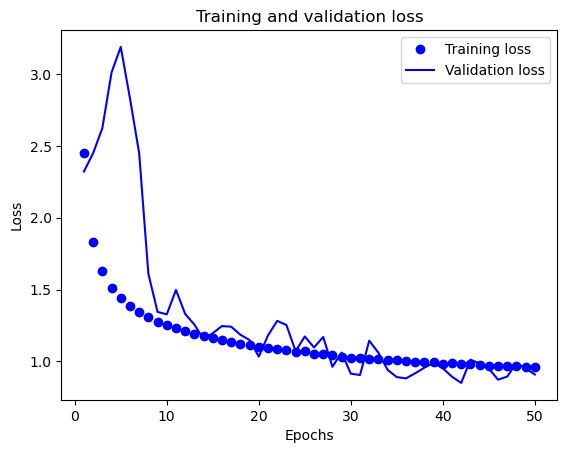

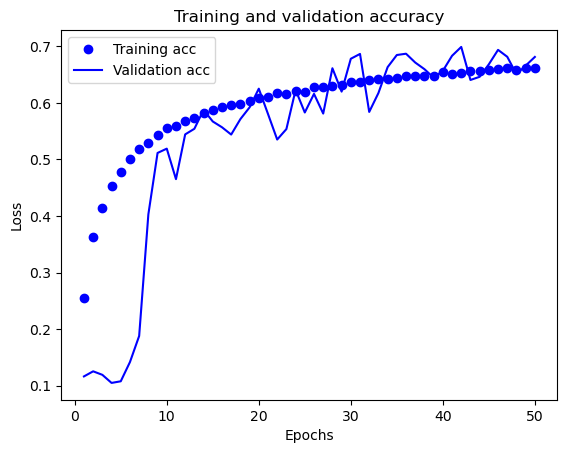

Test loss: 0.9167814254760742
Test accuracy: 0.6782000064849854


In [92]:
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, decay=0.0, nesterov=False)

#Compile the model using optimizer and loss function
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#train model
history = model.fit(partial_train_data, partial_train_labels,
epochs=50, batch_size=512,
validation_data=(train_val, label_val))

import matplotlib.pyplot as plt

#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy of final model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [90]:
from keras.models import Model

#Building functional API model with an inception block
x = layers.Input(shape = (32,32,3))

y = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
y = layers.MaxPooling2D((2,2))(y)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Conv2D(64,(3,3), activation='relu',padding='same')(y)
y = layers.MaxPooling2D((2,2))(y)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Conv2D(64,(3,3), activation='relu',padding='same')(y)
y = layers.MaxPooling2D((2,2))(y)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)

branch_a = layers.Conv2D(64, (3,3), activation='relu',padding='same')(y)
branch_a = layers.MaxPooling2D((2,2))(branch_a)
branch_a = layers.BatchNormalization()(branch_a)
branch_a = layers.Dropout(0.5)(branch_a)
branch_b = layers.Conv2D(64, (3,3), activation='relu',padding='same')(y)
branch_b = layers.MaxPooling2D((2,2))(branch_b)
branch_b = layers.BatchNormalization()(branch_b)
branch_b = layers.Dropout(0.5)(branch_b)

output = layers.concatenate([branch_a, branch_b], axis=-1)
output = layers.Flatten()(output)
output = layers.Dense(10,activation='softmax')(output)
model = Model(inputs = x,outputs = output)
print(model.summary())

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_63 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_314 (Conv2D)            (None, 32, 32, 32)   896         ['input_63[0][0]']               
                                                                                                  
 max_pooling2d_262 (MaxPooling2  (None, 16, 16, 32)  0           ['conv2d_314[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_156 (Batch  (None, 16, 16, 32)  128         ['max_pooling2d_262[0][0]'

Epoch 1/50
79/79 [==============================] - 4s 28ms/step - loss: 2.4677 - accuracy: 0.2536 - val_loss: 2.3251 - val_accuracy: 0.1048
Epoch 2/50
79/79 [==============================] - 2s 22ms/step - loss: 1.8551 - accuracy: 0.3551 - val_loss: 3.2399 - val_accuracy: 0.1030
Epoch 3/50
79/79 [==============================] - 2s 20ms/step - loss: 1.6566 - accuracy: 0.4092 - val_loss: 4.8084 - val_accuracy: 0.1030
Epoch 4/50
79/79 [==============================] - 2s 21ms/step - loss: 1.5516 - accuracy: 0.4411 - val_loss: 6.7634 - val_accuracy: 0.1030
Epoch 5/50
79/79 [==============================] - 2s 21ms/step - loss: 1.4783 - accuracy: 0.4634 - val_loss: 7.3531 - val_accuracy: 0.1030
Epoch 6/50
79/79 [==============================] - 2s 20ms/step - loss: 1.4224 - accuracy: 0.4839 - val_loss: 6.1679 - val_accuracy: 0.1030
Epoch 7/50
79/79 [==============================] - 2s 20ms/step - loss: 1.3705 - accuracy: 0.5031 - val_loss: 4.0798 - val_accuracy: 0.1240
Epoch 8/50
79

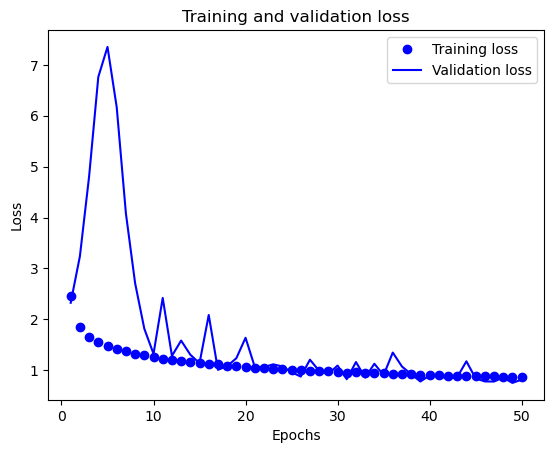

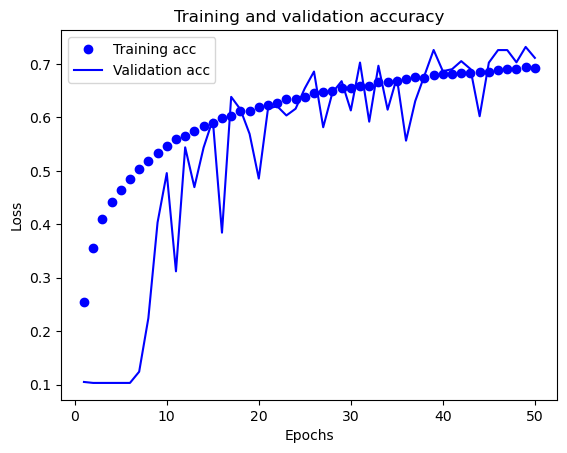

Test loss: 0.8352344036102295
Test accuracy: 0.7046999931335449


In [91]:
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, decay=0.0, nesterov=False)

#Compile the model using optimizer and loss function
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#Train model
history = model.fit(partial_train_data, partial_train_labels,
epochs=50, batch_size=512,
validation_data=(train_val, label_val))

import matplotlib.pyplot as plt

#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy of final model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [82]:
from keras.models import Model

#Building functional API model with a residual block
x = layers.Input(shape = (32,32,3))

y = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
y = layers.MaxPooling2D((2,2))(y)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Conv2D(64,(3,3), activation='relu',padding='same')(y)
y = layers.MaxPooling2D((2,2))(y)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Conv2D(64,(3,3), activation='relu',padding='same')(y)
y = layers.MaxPooling2D((2,2))(y)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)

residual = layers.Conv2D(64, (1,1), strides=2, padding='same')(x)
residual = layers.MaxPooling2D((2,2))(residual)
residual = layers.MaxPooling2D((2,2))(residual)

#add residual block
y = layers.add([y,residual])
output = layers.Flatten()(y)
output = layers.Dense(10,activation='softmax')(output)
model = Model(inputs = x,outputs = output)
print(model.summary())

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_62 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_310 (Conv2D)            (None, 32, 32, 32)   896         ['input_62[0][0]']               
                                                                                                  
 max_pooling2d_257 (MaxPooling2  (None, 16, 16, 32)  0           ['conv2d_310[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_153 (Batch  (None, 16, 16, 32)  128         ['max_pooling2d_257[0][0]'

Epoch 1/50
79/79 [==============================] - 3s 26ms/step - loss: 2.3407 - accuracy: 0.2922 - val_loss: 2.3939 - val_accuracy: 0.1038
Epoch 2/50
79/79 [==============================] - 2s 19ms/step - loss: 1.7362 - accuracy: 0.4030 - val_loss: 3.0341 - val_accuracy: 0.1030
Epoch 3/50
79/79 [==============================] - 2s 19ms/step - loss: 1.5370 - accuracy: 0.4563 - val_loss: 3.9482 - val_accuracy: 0.1030
Epoch 4/50
79/79 [==============================] - 2s 19ms/step - loss: 1.4182 - accuracy: 0.4979 - val_loss: 4.9771 - val_accuracy: 0.1030
Epoch 5/50
79/79 [==============================] - 2s 19ms/step - loss: 1.3465 - accuracy: 0.5165 - val_loss: 4.2714 - val_accuracy: 0.1054
Epoch 6/50
79/79 [==============================] - 2s 19ms/step - loss: 1.2889 - accuracy: 0.5395 - val_loss: 3.2313 - val_accuracy: 0.1507
Epoch 7/50
79/79 [==============================] - 1s 19ms/step - loss: 1.2388 - accuracy: 0.5595 - val_loss: 2.6252 - val_accuracy: 0.2246
Epoch 8/50
79

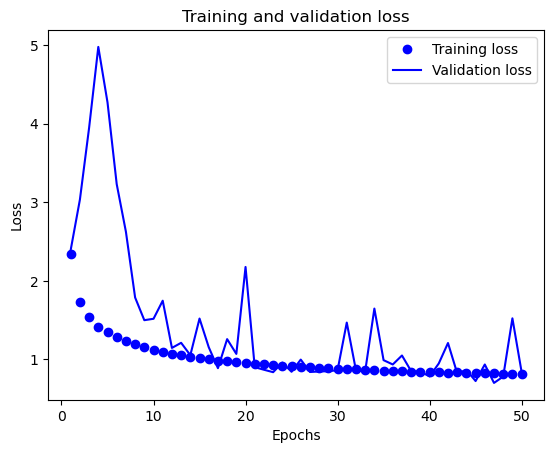

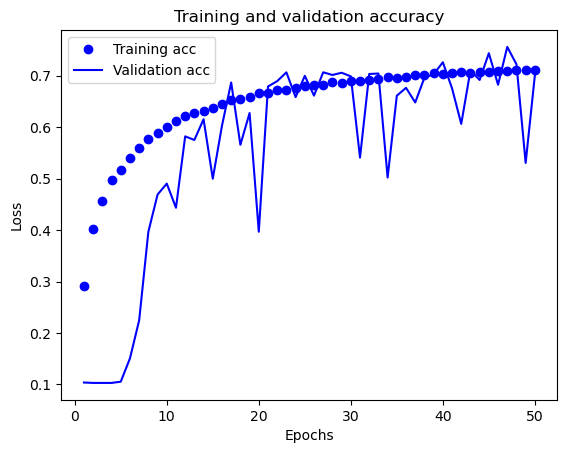

Test loss: 0.850620687007904
Test accuracy: 0.7006999850273132


In [83]:
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, decay=0.0, nesterov=False)

#Compile the model using optimizer and loss function
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#Train model
history = model.fit(partial_train_data, partial_train_labels,
epochs=50, batch_size=512,
validation_data=(train_val, label_val))

import matplotlib.pyplot as plt

#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy of final model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)